In [1]:
#Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
# Read in CSV files 
csv_path = "accidents-final.csv"
csv_path2 = "../FARS2016NationalCSV/person.csv"
csv_path3 = "../FARS2016NationalCSV/states.csv"

accidents = pd.read_csv(csv_path)
persons = pd.read_csv(csv_path2)

In [3]:
# Create columns of Date and Time to be used for Time of Day motor vehicle crashes
accidents["DATE"] = pd.to_datetime(accidents[["DAY","MONTH","YEAR","HOUR","MINUTE"]])
accidents["TIME"] = accidents["DATE"].dt.time

In [4]:
# Define and create column for Holidays and Weekends
accidents['HOLIDAYS'] = np.where((accidents["DATE"] > '2016-01-01') & (accidents["DATE"] < '2016-01-04 06:00:00')|
                                ((accidents["DATE"] > '2016-05-27 17:59:00') & (accidents["DATE"] < '2016-05-31 06:00:00'))|
                                ((accidents["DATE"] > '2016-07-01 17:59:00') & (accidents["DATE"] < '2016-07-05 06:00:00'))|
                                ((accidents["DATE"] > '2016-09-02 17:59:00') & (accidents["DATE"] < '2016-09-06 06:00:00'))|
                                ((accidents["DATE"] > '2016-11-23 17:59:00') & (accidents["DATE"] < '2016-11-28 06:00:00'))|
                                ((accidents["DATE"] > '2016-12-23 17:59:00') & (accidents["DATE"] < '2016-12-27 06:00:00'))|
                                ((accidents["DAY_WEEK"] == 6) & (accidents["HOUR"] >= 18) & (accidents["HOUR"] <= 23))|
                                (accidents["DAY_WEEK"] == 1)|(accidents["DAY_WEEK"] == 7)|
                                ((accidents["DAY_WEEK"] == 2) & (accidents["HOUR"] >= 0) & (accidents["HOUR"] <= 5))
                                , "1","0")

In [5]:
# Remove "Unknown" hours from analysis
accidents_df = accidents[accidents["HOUR"] != 99]
accidents_df["HOLIDAYS"] = accidents_df["HOLIDAYS"].map({"1": "Weekends/Holidays", "0": "Weekdays"})

/Users/andrea/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
weekdays = accidents_df[accidents_df["HOLIDAYS"] == "Weekdays"]
holidays = accidents_df[accidents_df["HOLIDAYS"] == "Weekends/Holidays"]

In [7]:
# Fatalities and Alcohol Related Crashes by Weekends/Holidays and Weekdays
zz = accidents_df.groupby("HOLIDAYS")
zzz = zz[["FATALS"]].sum().sort_values(by= ["FATALS"], ascending=False)
zzz["Percentage"] = 100 * zzz["FATALS"]/zzz["FATALS"].sum()
zzz = zzz.rename(columns = {"FATALS": "Fatalities Count", "Percentage": "Percent of Fatalities"})

aaa = zz[["DRUNK_DR"]].sum().sort_values(by= ["DRUNK_DR"], ascending=False)
aaa["Percentage"] = 100 * aaa["DRUNK_DR"]/aaa["DRUNK_DR"].sum()
aaa = aaa.rename(columns = {"DRUNK_DR": "Alcohol Related Crashes Count", "Percentage": "Percent of Alcohol Related Crashes"})

zzz_aaa = zzz.join(aaa).round(2)
fatals_drunkdr = zzz_aaa[["Fatalities Count", "Alcohol Related Crashes Count", "Percent of Fatalities", "Percent of Alcohol Related Crashes"]]
fatals_drunkdr

,Fatalities Count,Alcohol Related Crashes Count,Percent of Fatalities,Percent of Alcohol Related Crashes
HOLIDAYS,,,,
Weekdays,21122,3685,56.81,41.52
Weekends/Holidays,16059,5191,43.19,58.48


In [8]:
# Drinking on Weekdays by STATE
drunk_weekdays_bystate = weekdays.groupby("STATE")[["DRUNK_DR"]].sum()
total_drunk_weekdays = accidents_df["DRUNK_DR"].sum()
drunk_rate_weekdays = (drunk_weekdays_bystate/total_drunk_weekdays *100).sort_values(by=["DRUNK_DR"],ascending=False)
drunk_rate_weekdays = drunk_rate_weekdays.rename(columns = {"DRUNK_DR": "Weekdays - % of Alcohol Related Crashes"})

# Drinking on Holidays/Weekends by STATE
drunk_holidays_bystate = holidays.groupby("STATE")[["DRUNK_DR"]].sum()
total_drunk_holidays = accidents_df["DRUNK_DR"].sum()
drunk_rate_holidays = (drunk_holidays_bystate/total_drunk_holidays *100).sort_values(by=["DRUNK_DR"],ascending=False)
drunk_rate_holidays = drunk_rate_holidays.rename(columns = {"DRUNK_DR": "Weekends/Holidays - % of Alcohol Related Crashes"})

# Join tables for comparison
drinking_bystate = drunk_rate_weekdays.join(drunk_rate_holidays).round(2)
drinking_bystate.head()

,Weekdays - % of Alcohol Related Crashes,Weekends/Holidays - % of Alcohol Related Crashes
STATE,,
Texas,3.65,6.19
California,3.54,5.45
Florida,3.03,4.19
North Carolina,2.13,2.26
Ohio,1.77,2.34


In [9]:
# Number of Fatalities on Weekdays by STATE
fatals_weekdays_bystate = weekdays.groupby("STATE")[["FATALS"]].sum()
total_fatals = accidents_df["FATALS"].sum()
fatals_rate_weekdays = (fatals_weekdays_bystate/total_fatals *100).sort_values(by=["FATALS"],ascending=False)
fatals_rate_weekdays = fatals_rate_weekdays.rename(columns = {"FATALS": "Weekdays - % of Fatalities"})

# Number of Fatalities on Holidays/Weekends by STATE
fatals_holidays_bystate = holidays.groupby("STATE")[["FATALS"]].sum()
fatals_rate_holidays = (fatals_holidays_bystate/total_fatals *100).sort_values(by=["FATALS"],ascending=False)
fatals_rate_holidays = fatals_rate_holidays.rename(columns = {"FATALS": "Weekends/Holidays - % of Fatalities"})

# Join tables for comparison
fatals_bystate = fatals_rate_weekdays.join(fatals_rate_holidays).round(2)
fatals_bystate.head()

,Weekdays - % of Fatalities,Weekends/Holidays - % of Fatalities
STATE,,
Texas,5.51,4.64
California,5.22,4.37
Florida,4.61,3.92
Georgia,2.40,1.76
North Carolina,2.30,1.60


In [10]:
# Total % of Motor Vehicle Crashes by County
total_x = accidents_df["STATE"].count()
bystate_x = holidays.groupby(["STATE"])[["HOLIDAYS"]].count().sort_values(by=["HOLIDAYS"],ascending=False)
bystate_hol = (bystate_x/total_x*100).sort_values(by=["HOLIDAYS"],ascending=False)
bystate_hol = bystate_hol.rename(columns = {"HOLIDAYS": "% of Motor Vehicle Accidents- Holidays/Weekends"})


bystate_y = weekdays.groupby(["STATE"])[["HOLIDAYS"]].count().sort_values(by=["HOLIDAYS"],ascending=False)
bystate_week = (bystate_y/total_x*100).sort_values(by=["HOLIDAYS"],ascending=False)
bystate_week = bystate_week.rename(columns = {"HOLIDAYS": "% of Motor Vehicle Accidents- Weekdays"})

bystate = bystate_week.join(bystate_hol).round(2)
bystate.head()


,% of Motor Vehicle Accidents- Weekdays,% of Motor Vehicle Accidents- Holidays/Weekends
STATE,,
Texas,5.46,4.51
California,5.33,4.33
Florida,4.69,3.89
Georgia,2.40,1.74
North Carolina,2.34,1.60


In [11]:
# Total % of Motor Vehicle Crashes by County
total = accidents_df["STATE"].count()
county = holidays.groupby(["COUNTY","STATE"])[["HOLIDAYS"]].count().sort_values(by=["HOLIDAYS"],ascending=False)
county_x = (county/total*100).sort_values(by=["HOLIDAYS"],ascending=False)
county_x = county_x.rename(columns = {"HOLIDAYS": "% of Motor Vehicle Accidents - Weekends/Holidays"})


county_y = weekdays.groupby(["COUNTY","STATE"])[["HOLIDAYS"]].count().sort_values(by=["HOLIDAYS"],ascending=False)
county_weekday = (county_y/total*100).sort_values(by=["HOLIDAYS"],ascending=False)
county_weekday = county_weekday.rename(columns = {"HOLIDAYS": "% of Motor Vehicle Accidents - Weekdays"})

county_perc = county_weekday.join(county_x).round(2)
county_perc.head()

,,% of Motor Vehicle Accidents - Weekdays,% of Motor Vehicle Accidents - Weekends/Holidays
COUNTY,STATE,,
Los Angeles,California,1.23,0.92
Maricopa,Arizona,0.77,0.54
Harris,Texas,0.58,0.66
Dallas,Texas,0.42,0.42
Cook,Illinois,0.41,0.34


In [12]:
# Alcohol Related Crashes at the County Level
county_weekdays_dd = weekdays.groupby(["COUNTY","STATE"])[["DRUNK_DR"]].sum()
county_drunk_weekdays = (county_weekdays_dd/total_drunk_weekdays *100).sort_values(by=["DRUNK_DR"],ascending=False)
county_drunk_weekdays = county_drunk_weekdays.rename(columns = {"DRUNK_DR": "Weekdays - % of Alcohol Related Crashes"})

county_holidays_dd = holidays.groupby(["COUNTY","STATE"])[["DRUNK_DR"]].sum()
county_drunk_holidays = (county_holidays_dd/total_drunk_holidays *100).sort_values(by=["DRUNK_DR"],ascending=False)
county_drunk_holidays = county_drunk_holidays.rename(columns = {"DRUNK_DR": "Weekends/Holidays - % of Alcohol Related Crashes"})

drunk_rate_bycounty = county_drunk_weekdays.join(county_drunk_holidays).round(2)
drunk_rate_bycounty.head()

,,Weekdays - % of Alcohol Related Crashes,Weekends/Holidays - % of Alcohol Related Crashes
COUNTY,STATE,,
Harris,Texas,0.65,1.16
Los Angeles,California,0.61,0.81
Maricopa,Arizona,0.61,0.65
Dallas,Texas,0.39,0.64
Hillsborough,Florida,0.32,0.35


In [14]:
# Fatality Numbers at the County Level
total_fatals = accidents_df["FATALS"].sum()
county_weekdays_ff = weekdays.groupby(["COUNTY","STATE"])[["FATALS"]].sum()
county_fatals_weekdays = (county_weekdays_ff/total_fatals *100).sort_values(by=["FATALS"],ascending=False)
county_fatals_weekdays = county_fatals_weekdays.rename(columns = {"FATALS": "Weekdays - % of Fatalities"})

county_holidays_ff = holidays.groupby(["COUNTY","STATE"])[["FATALS"]].sum()
county_fatals_holidays = (county_holidays_ff/total_fatals *100).sort_values(by=["FATALS"],ascending=False)
county_fatals_holidays = county_fatals_holidays.rename(columns = {"FATALS": "Weekends/Holidays - % of Fatalities"})

fatals_bycounty = county_fatals_weekdays.join(county_fatals_holidays)

drunk_fatals_bycounty_x = drunk_rate_bycounty.join(fatals_bycounty).round(2)
drunk_fatals_bycounty = drunk_fatals_bycounty_x[["Weekdays - % of Alcohol Related Crashes", "Weekends/Holidays - % of Alcohol Related Crashes", "Weekdays - % of Fatalities", "Weekends/Holidays - % of Fatalities"]]
drunk_fatals_bycounty.head()

,,Weekdays - % of Alcohol Related Crashes,Weekends/Holidays - % of Alcohol Related Crashes,Weekdays - % of Fatalities,Weekends/Holidays - % of Fatalities
COUNTY,STATE,,,,
Harris,Texas,0.65,1.16,0.55,0.63
Los Angeles,California,0.61,0.81,1.20,0.92
Maricopa,Arizona,0.61,0.65,0.74,0.53
Dallas,Texas,0.39,0.64,0.43,0.41
Hillsborough,Florida,0.32,0.35,0.30,0.31


In [15]:
routes_d = accidents.groupby(["STATE", "ROUTE"])["ROUTE"].count().unstack()
routes_d.fillna(0, inplace=True)
routes_d["highways"] = routes_d["Interstate"] + routes_d["State Highway"] + routes_d["U.S. Highway"]
routes_d["locals"] = routes_d["County Road"] + routes_d["Local Street - Township"] + routes_d["Local Street - Frontage Road"]+ routes_d["Local Street - Municipality"] + routes_d["Other"]
routes_d["totals"] = routes_d["highways"]+ routes_d["locals"]+routes_d["Unknown"]
routes_d["highways_perc"] = routes_d["highways"]/routes_d["totals"]*100
routes_d["locals_perc"] = routes_d["locals"]/routes_d["totals"]*100
routes_bystate = routes_d[["highways","locals","Unknown","totals","highways_perc","locals_perc"]]

routes_bystate = routes_bystate.round(2)
routes_bystate.sort_values(by=["totals"], ascending=False)


ROUTE,highways,locals,Unknown,totals,highways_perc,locals_perc
STATE,,,,,,
Texas,1591.0,1816.0,0.0,3407.0,46.70,53.30
California,1355.0,1933.0,69.0,3357.0,40.36,57.58
Florida,1686.0,1239.0,8.0,2933.0,57.48,42.24
Georgia,862.0,560.0,0.0,1422.0,60.62,39.38
North Carolina,932.0,415.0,1.0,1348.0,69.14,30.79
Pennsylvania,908.0,180.0,0.0,1088.0,83.46,16.54
Ohio,611.0,434.0,8.0,1053.0,58.02,41.22
Illinois,520.0,483.0,0.0,1003.0,51.84,48.16
Michigan,396.0,583.0,1.0,980.0,40.41,59.49


In [16]:
# Routes by state (weekdays)
routes_y = weekdays.groupby(["STATE", "ROUTE"])["ROUTE"].count().unstack()
routes_y.fillna(0, inplace=True)
routes_y["highways"] = routes_y["Interstate"] + routes_y["State Highway"] + routes_y["U.S. Highway"]
routes_y["locals"] = routes_y["County Road"] + routes_y["Local Street - Township"] + routes_y["Local Street - Frontage Road"]+ routes_y["Local Street - Municipality"] + routes_y["Other"]
routes_y["totals"] = routes_y["highways"]+ routes_y["locals"]+ routes_y["Unknown"]
routes_y["highways_perc"] = routes_y["highways"]/routes_d["totals"]*100
routes_y["locals_perc"] = routes_y["locals"]/routes_d["totals"]*100
routes_bystate_weekdays = routes_y[["highways","locals","Unknown","totals","highways_perc","locals_perc"]]

routes_bystate_weekdays = routes_bystate_weekdays.round(2)
routes_bystate_weekdays.sort_values(by=["locals_perc"], ascending=False)

ROUTE,highways,locals,Unknown,totals,highways_perc,locals_perc
STATE,,,,,,
District of Columbia,0.0,14.0,0.0,14.0,0.00,53.85
Michigan,246.0,325.0,1.0,572.0,25.10,33.16
Arizona,192.0,286.0,5.0,483.0,22.20,33.06
New York,273.0,311.0,1.0,585.0,28.29,32.23
California,711.0,1078.0,34.0,1823.0,21.18,32.11
Washington,133.0,158.0,0.0,291.0,26.39,31.35
New Jersey,165.0,170.0,0.0,335.0,29.00,29.88
Alaska,18.0,23.0,1.0,42.0,23.08,29.49
Minnesota,112.0,105.0,0.0,217.0,31.37,29.41


In [17]:
# Routes by state (weekend/holidays)
routes_x = holidays.groupby(["STATE", "ROUTE"])["ROUTE"].count().unstack()
routes_x.fillna(0, inplace=True)
routes_x["highways"] = routes_x["Interstate"] + routes_x["State Highway"] + routes_x["U.S. Highway"]
routes_x["locals"] = routes_x["County Road"] + routes_x["Local Street - Township"] + routes_x["Local Street - Frontage Road"]+ routes_x["Local Street - Municipality"] + routes_x["Other"]
routes_x["totals"] = routes_x["highways"]+ routes_x["locals"]+ routes_x["Unknown"]
routes_x["highways_perc"] = routes_x["highways"]/routes_d["totals"]*100
routes_x["locals_perc"] = routes_x["locals"]/routes_d["totals"]*100
routes_bystate_holidays = routes_x[["highways","locals","Unknown","totals","highways_perc","locals_perc"]]

routes_bystate_holidays = routes_bystate_holidays.round(2)
routes_bystate_holidays.sort_values(by=["totals"], ascending=False).head()

ROUTE,highways,locals,Unknown,totals,highways_perc,locals_perc
STATE,,,,,,
Texas,682.0,859.0,0.0,1541.0,20.02,25.21
California,619.0,828.0,33.0,1480.0,18.44,24.66
Florida,751.0,577.0,2.0,1330.0,25.61,19.67
Georgia,345.0,251.0,0.0,596.0,24.26,17.65
North Carolina,374.0,172.0,0.0,546.0,27.74,12.76


In [18]:
# Harmful Events Comparison between weekdays and weekends/holidays
harm_b = weekdays.groupby(["HARM_EV"]).count()
harm_weekdays =harm_b[["HOLIDAYS"]].sort_values(by= ["HOLIDAYS"], ascending=False)
harm_weekdays['Percentage'] = 100 * harm_weekdays["HOLIDAYS"]/harm_weekdays["HOLIDAYS"].sum()
harm_weekdays = harm_weekdays.rename(columns = {"HOLIDAYS": "Weekdays - Harmful Events Counts", "Percentage": "Weekdays - Percent of Harmful Events"})

harm_a = holidays.groupby(["HARM_EV"]).count()
harm_holidays =harm_a[["HOLIDAYS"]].sort_values(by= ["HOLIDAYS"], ascending=False)
harm_holidays['Percentage'] = 100 * harm_holidays["HOLIDAYS"]/harm_holidays["HOLIDAYS"].sum()
harm_holidays = harm_holidays.rename(columns = {"HOLIDAYS": "Weekends/Holidays - Harmful Events Counts", "Percentage": "Weekends/Holidays - Percent of Harmful Events"})

harm_ev = harm_weekdays.join(harm_holidays).round(2)
harm_ev.head()

,Weekdays - Harmful Events Counts,Weekdays - Percent of Harmful Events,Weekends/Holidays - Harmful Events Counts,Weekends/Holidays - Percent of Harmful Events
HARM_EV,,,,
Motor Vehicle In-Transport,8268,42.20,4811.0,32.99
Pedestrian,3097,15.81,2426.0,16.64
Rollover/Overturn,1583,8.08,1438.0,9.86
Tree (Standing Only),1265,6.46,1231.0,8.44
Curb,546,2.79,524.0,3.59


In [19]:
# Function to define and apply hours of the day into groups
def label_hour (row):
    if (row['HOUR'] > 4) & (row['HOUR'] <= 11):
        return 'Morning'
    elif (row['HOUR'] > 11) & (row['HOUR'] <= 16):
        return 'Afternoon'
    elif (row['HOUR'] > 16) & (row['HOUR'] <= 20):
        return 'Evening'
    elif (row['HOUR'] > 20) & (row['HOUR'] <= 23)| (row['HOUR'] >=0) & (row['HOUR'] <=5):
        return 'Night'
    return 'Other'

In [20]:
# Create column and apply hours of the day from function
accidents_df['HOUR_LABEL'] = accidents_df.apply (lambda row: label_hour (row),axis=1)

/Users/andrea/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# Calculations and percentages
hours_groupby = accidents_df.groupby(["HOLIDAYS","HOUR_LABEL"])["HOUR_LABEL"].count().unstack().reset_index()
hours_groupby["Totals"] = hours_groupby["Afternoon"]+ hours_groupby["Evening"] + hours_groupby["Morning"]+ hours_groupby["Night"]
hours_groupby["Afternoon_perc"] = hours_groupby["Afternoon"]/hours_groupby["Totals"]*100
hours_groupby["Evening_perc"] = hours_groupby["Evening"]/hours_groupby["Totals"]*100
hours_groupby["Morning_perc"] = hours_groupby["Morning"]/hours_groupby["Totals"]*100
hours_groupby["Night_perc"] = hours_groupby["Night"]/hours_groupby["Totals"]*100
hours = hours_groupby[["Morning_perc","Afternoon_perc", "Evening_perc", "Night_perc"]]

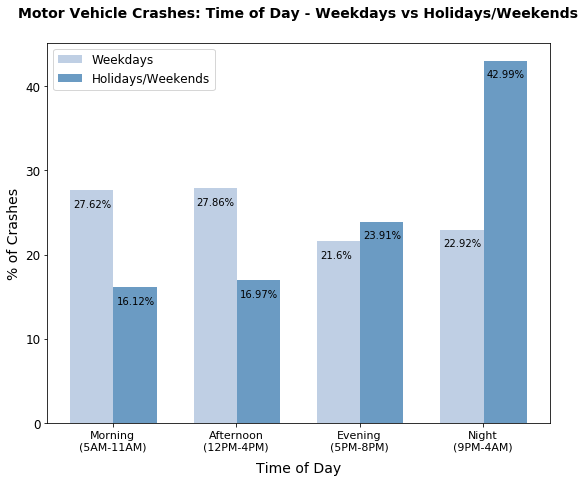

In [22]:
#Create graph
#plt.style.use("seaborn")

# Set-up of x-axis and colors and size
x_axis = np.arange(len(accidents_df["HOUR_LABEL"].unique()))
fig = plt.figure(figsize = (9,7))
hours_holidays = hours.iloc[1].values.tolist()
hours_weekdays = hours.iloc[0].values.tolist()

# Creat bar chart 
bar1 = plt.bar(x_axis, hours_weekdays, 
                 alpha=0.8,width=0.35,
                 color='lightsteelblue',
                 label='Weekdays')
bar2 = plt.bar(x_axis+0.35, hours_holidays, 
                 alpha=0.8,width=0.35,
                 color='steelblue',
                 label='Holidays/Weekends')

# Specify tick location and labels
tick_locations = [value+0.17 for value in x_axis]
plt.xticks(tick_locations, ['Morning\n(5AM-11AM)', 'Afternoon\n(12PM-4PM)', 'Evening\n(5PM-8PM)', 'Night\n(9PM-4AM)'])

# Set title, x and y labels, sizing, and formatting of chart
plt.title("Motor Vehicle Crashes: Time of Day - Weekdays vs Holidays/Weekends", fontsize = 14, fontweight='bold', y=1.05)
plt.xlabel("Time of Day", labelpad=10, fontsize = 14)
plt.ylabel("% of Crashes", fontsize = 14)
plt.xticks(size = 11)
plt.yticks(size = 12)
plt.legend(loc='best',fontsize = 12)

# Add text labels
for a,b in zip(x_axis, hours_weekdays):
    b = round(b,2)
    plt.text(a-0.15, b-2, str(b)+'%', color='black',fontsize = 10)
for a,b in zip(x_axis, hours_holidays):
    b = round(b,2)
    plt.text(a+0.2, b-2, str(b)+'%', color='black',fontsize = 10)

# Save and display image
plt.savefig("timeofday_holidays_vs_weekdays.png")
plt.show()

In [23]:
# Calculations and Comparisons of Crash Routes - Weekends/Holidays vs Weekdays
route_groupby = accidents_df.groupby(["HOLIDAYS","ROUTE"])["ROUTE"].count().unstack().reset_index()
route_groupby["highways"] = route_groupby["Interstate"] + route_groupby["State Highway"] + route_groupby["U.S. Highway"]
route_groupby["locals"] = route_groupby["County Road"] + route_groupby["Local Street - Township"] + route_groupby["Local Street - Frontage Road"]+ route_groupby["Local Street - Municipality"]
route_groupby["other/unknown"] = route_groupby["Unknown"]  + route_groupby["Other"]
route_groupby["totals"] = route_groupby["highways"]+ route_groupby["locals"] +route_groupby["other/unknown"]
route_groupby["highways_perc"] = route_groupby["highways"]/route_groupby["totals"]*100
route_groupby["locals_perc"] = route_groupby["locals"]/route_groupby["totals"]*100
route_groupby["other_perc"] = route_groupby["other/unknown"]/route_groupby["totals"]*100
routes = route_groupby[["highways_perc","locals_perc"]]

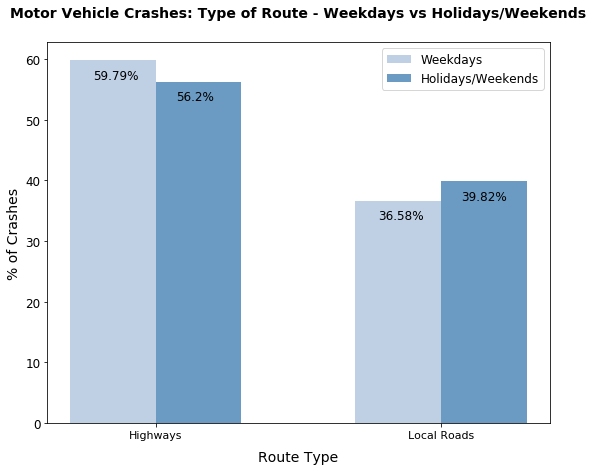

In [24]:
#Create graph
#plt.style.use("seaborn")

# Set-up of x-axis and colors and size
x_axis = np.arange(len(accidents_df["HOLIDAYS"].unique()))
fig = plt.figure(figsize = (9,7))
weekdayroute = routes.iloc[0].values.tolist()
holidayroute = routes.iloc[1].values.tolist()

# Creat bar chart 
bar1 = plt.bar(x_axis, weekdayroute, 
                 alpha=0.8,width=0.3,
                 color='lightsteelblue',
                 label='Weekdays')
bar2 = plt.bar(x_axis+0.3, holidayroute, 
                 alpha=0.8,width=0.3,
                 color='steelblue',
                 label='Holidays/Weekends')

# Specify tick location and labels
tick_locations = [value+0.15 for value in x_axis]
plt.xticks(tick_locations, ['Highways', 'Local Roads'])

# Set title, x and y labels, sizing, and formatting of chart
plt.title("Motor Vehicle Crashes: Type of Route - Weekdays vs Holidays/Weekends", fontsize = 14, fontweight='bold', y=1.05)
plt.xlabel("Route Type", labelpad=10, fontsize = 14)
plt.ylabel("% of Crashes", fontsize = 14)
plt.xticks(size = 11)
plt.yticks(size = 12)
plt.legend(loc='best',fontsize = 12)

# Add text labels
for a,b in zip(x_axis, weekdayroute):
    b = round(b,2)
    plt.text(a-0.07, b-3, str(b)+'%', color='black',fontsize = 12)
for a,b in zip(x_axis, holidayroute):
    b = round(b,2)
    plt.text(a+.22, b-3, str(b)+'%', color='black',fontsize = 12)

# Save and display image
plt.savefig("route_holidays_vs_weekdays.png")
plt.show()


In [25]:
harm_y = weekdays.groupby(["STATE", "HARM_EV"])["HARM_EV"].count().unstack()
harm_y.fillna(0, inplace=True)
harm_y["Most Frequent Harmful Event"] = harm_y.idxmax(axis=1)
harm_y['Total'] = harm_y.sum(axis=1)
harm_yy = harm_y[["Motor Vehicle In-Transport","Curb", "Tree (Standing Only)", "Pedestrian", "Rollover/Overturn", "Total","Most Frequent Harmful Event"]]
harm_yy.loc[:,"Motor Vehicle In-Transport":"Rollover/Overturn"] = harm_yy.loc[:,"Motor Vehicle In-Transport":"Rollover/Overturn"].div(harm_yy["Total"], axis=0)*100
harm_weekdays = harm_yy.round(2)
harm_weekdays.head()

/Users/andrea/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


HARM_EV,Motor Vehicle In-Transport,Curb,Tree (Standing Only),Pedestrian,Rollover/Overturn,Total,Most Frequent Harmful Event
STATE,,,,,,,
Alabama,38.13,1.50,13.83,11.40,7.66,535.0,Motor Vehicle In-Transport
Alaska,35.71,4.76,2.38,14.29,16.67,42.0,Motor Vehicle In-Transport
Arizona,40.99,3.73,1.66,18.84,14.08,483.0,Motor Vehicle In-Transport
Arkansas,46.82,0.67,8.70,7.69,8.36,299.0,Motor Vehicle In-Transport
California,35.66,6.75,4.33,23.92,6.09,1823.0,Motor Vehicle In-Transport


In [26]:
harm_x = holidays.groupby(["STATE", "HARM_EV"])["HARM_EV"].count().unstack()
harm_x.fillna(0, inplace=True)
harm_x["Most Frequent Harmful Event"] = harm_x.idxmax(axis=1)
harm_x["Total"] = harm_x.sum(axis=1)
harm_xx = harm_x[["Motor Vehicle In-Transport","Curb", "Tree (Standing Only)", "Pedestrian", "Rollover/Overturn", "Total","Most Frequent Harmful Event"]]
harm_xx.loc[:,"Motor Vehicle In-Transport":"Rollover/Overturn"] = harm_xx.loc[:,"Motor Vehicle In-Transport":"Rollover/Overturn"].div(harm_xx["Total"], axis=0)*100
harm_holidays = harm_xx.round(2)
harm_holidays.head()

/Users/andrea/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


HARM_EV,Motor Vehicle In-Transport,Curb,Tree (Standing Only),Pedestrian,Rollover/Overturn,Total,Most Frequent Harmful Event
STATE,,,,,,,
Alabama,31.39,1.27,17.72,10.89,9.87,395.0,Motor Vehicle In-Transport
Alaska,25.81,3.23,3.23,16.13,16.13,31.0,Motor Vehicle In-Transport
Arizona,30.17,5.59,1.96,24.30,17.88,358.0,Motor Vehicle In-Transport
Arkansas,33.16,2.67,11.23,9.09,13.37,187.0,Motor Vehicle In-Transport
California,30.95,7.64,5.41,22.50,7.84,1480.0,Motor Vehicle In-Transport


In [27]:
csv_path1 = "accident_2015.csv"
csv_path2 = "../FARS2016NationalCSV/states.csv"
csv_path3 = "../FARS2016NationalCSV/CF.csv"
accidents = pd.read_csv(csv_path)
accidents2015 = pd.read_csv(csv_path1)
states = pd.read_csv(csv_path2)
CF = pd.read_csv(csv_path3)

In [28]:
csv_path4 = "accident.sas7bdat"
csv_path5 = "accident2013.sas7bdat"
accidents2014 = pd.read_sas(csv_path4)
accidents2013 = pd.read_sas(csv_path5)

In [29]:
accidents2013['STATE'] = accidents2013['STATE'].map(states.set_index('Codes')['State'])
accidents2013['CF1'] = accidents2013['CF1'].map(CF.set_index('Code')['Attribute'])
accidents2014['STATE'] = accidents2014['STATE'].map(states.set_index('Codes')['State'])
accidents2014['CF1'] = accidents2014['CF1'].map(CF.set_index('Code')['Attribute'])
accidents2015['STATE'] = accidents2015['STATE'].map(states.set_index('Codes')['State'])
accidents2015['CF1'] = accidents2015['CF1'].map(CF.set_index('Code')['Attribute'])

In [30]:
accidents2013 = accidents2013[["STATE", "DAY","MONTH","DAY_WEEK","YEAR","HOUR","MINUTE", "CF1"]]
accidents2014 = accidents2014[["STATE", "DAY","MONTH","DAY_WEEK","YEAR","HOUR","MINUTE", "CF1"]]
accidents2015 = accidents2015[["STATE", "DAY","MONTH","DAY_WEEK","YEAR","HOUR","MINUTE", "CF1"]]

In [31]:
CF1test = accidents.groupby(["STATE", "CF1"])["CF1"].count().unstack()
CF1test.fillna(0, inplace=True)
CF1test = CF1test.drop("None", axis=1)
CF1test["2016 Factors Related to Crash (2nd Most)"] = CF1test.idxmax(axis = 1, skipna=True)
CF2016 = CF1test[["2016 Factors Related to Crash (2nd Most)"]]

CF2test = accidents2015.groupby(["STATE", "CF1"])["CF1"].count().unstack()
CF2test.fillna(0, inplace=True)
CF2test = CF2test.drop("None", axis=1)
CF2test["2015 Factors Related to Crash (2nd Most)"] = CF2test.idxmax(axis = 1, skipna=True)
CF2015 = CF2test[["2015 Factors Related to Crash (2nd Most)"]]

CF3test = accidents2014.groupby(["STATE", "CF1"])["CF1"].count().unstack()
CF3test.fillna(0, inplace=True)
CF3test = CF3test.drop("None", axis=1)
CF3test["2014 Factors Related to Crash (2nd Most)"] = CF3test.idxmax(axis = 1, skipna=True)
CF2014 = CF3test[["2014 Factors Related to Crash (2nd Most)"]]

CF4test = accidents2013.groupby(["STATE", "CF1"])["CF1"].count().unstack()
CF4test.fillna(0, inplace=True)
CF4test = CF4test.drop("None", axis=1)
CF4test["2013 Factors Related to Crash (2nd Most)"] = CF4test.idxmax(axis = 1, skipna=True)
CF2013 = CF4test[["2013 Factors Related to Crash (2nd Most)"]]

In [32]:
CF_1516 = CF2015.join(CF2016)
CF_1314 = CF2013.join(CF2014)
CF_all = CF_1314.join(CF_1516)
CF_all

CF1,2013 Factors Related to Crash (2nd Most),2014 Factors Related to Crash (2nd Most),2015 Factors Related to Crash (2nd Most),2016 Factors Related to Crash (2nd Most)
STATE,,,,
Alabama,Police Pursuit Involved,"Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some..."
Alaska,Non-Occupant Struck Vehicle,Other Maintenance or Construction-Created Cond...,Backup Due to Regular Congestion,Speed Limit is a Statutory Limit as Recorded o...
Arizona,"Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some..."
Arkansas,Recent Previous Crash Scene Nearby,Recent Previous Crash Scene Nearby,Indication of a Stalled/Disabled Vehicle,Indication of a Stalled/Disabled Vehicle
California,"Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some..."
Colorado,"Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some...","Motor Vehicle Struck by Falling Cargo, or Some..."
Connecticut,Unknown,"Motor Vehicle Struck by Falling Cargo, or Some...",Backup Due to Regular Congestion,Police Pursuit Involved
Delaware,Aggressive Driving / Road Rage by Non-Contact ...,Police Pursuit Involved,Indication of a Stalled/Disabled Vehicle,"Motor Vehicle Struck by Falling Cargo, or Some..."
District of Columbia,Aggressive Driving / Road Rage by Non-Contact ...,Other Maintenance or Construction-Created Cond...,Indication of a Stalled/Disabled Vehicle,Unknown
